We used 2 modules(numpy). The following functions were used:
- np.random.uniform() 
- np.random.normal()
- np.shape()
- np.abs()
- np.array()
- np.arange()
- np.append()
- np.mean()
- np.linspace()
- np.meshgrid()

In [69]:
import numpy.random as random
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import time

So ultimately we need to learn how to make predictions. We will be given an input data(X) and correspoding ouput data(Y) to learn from. This is referred as training data. Then we will be be fed some unseen data referred as training data and using what we will need to predict the output data. But for now to keep things simple lets create our small dataset for ourselves.

#Step 1. A simple noisy linear dataset.

The dataset will consist of a set of N pairs of points: <br><center>
{<br>
  ($x_{1}$,$y_{1}$),<br>
  ($x_{2}$,$y_{2}$),<br>
  .<br>
  .<br>
  . <br>
  ($x_{N}$,$y_{N}$)<br>
}<br></center>
We will assume that both $x_{i}$ and $y_{i}$ are each scalars, i.e. 1-dimensional points.  So,we could also see X as a vector s.t. X ∈ $R^{N}$. Where N is the length of the vector. 
Similarly Y ∈ $R^{N}$.<br>

The relationship between X and Y is linear and has some noise
           <br><center> Y = w X + b + noise </center><br>
Where
- w is the slope referred to as weight.
- b is the intercept or offset referred to as bias.
- Noise is a value added to each measurement. Here it can be uniform or gaussian in nature.


##a) 
This function randomly chooses values for our w and b from uniform distribution(U (-2, 2)) coefficient


In [70]:
def chooseParams(low=-2,high=2,points=2):
  return random.uniform(low=low, high=high, size=(points))

##b)
This function generates a dataset with input X and output Y.
- n - number of data points to be generated from uniform distribution between - xLo and xHi
- xLo - start of uniformly distributed X values
- xHi - end of uniformly distributed X values
- w,b - input output relationship coefficients
- noiseType - They can be uniform or gaussian
- - if the noise type is uniform it is characterized by min-max bounds (to be taken -1 to 1)
- - if the noise type is gaussian it is characterized by sigma and mean(to be assumed 0).
- sigma - relevant in the case of gaussian noise

The function returns two arrays X and Y.

In [71]:
def generateNoisyLinearData(n,xLo,xHi,w,b,noiseType,sigma):
  x = random.uniform(low=xLo,high=xHi,size=n)
  if noiseType == 'uniform':
    noise = random.uniform(low = -1,high = -1,size=(n))

  elif noiseType == 'gaussian':
    noise = random.normal(scale=sigma,loc = 0, size=(n))

  else:
    print("Please select correct noise type")
  yTrue = w*x + b + noise

  return x,yTrue

##c)

Graphic representation of input and output relationship

plt.figure(figsize=(10,6), tight_layout=True)ax = sns.scatterplot(data=df_country, x='height_cm', y='weight_kg',   hue='nationality', palette='Set2', s=60)ax.set(xlabel='Height (cm)', ylabel='Weight (kg)')
ax.legend(title='Country', title_fontsize = 12) 
plt.show()

In [72]:
def plotLinearData(x,y):
  plt.style.context('classic')
  plt.figure(figsize=(10,8),tight_layout=True)
  plt.scatter(x=x,y=y,)
  plt.xlabel("Input(X)")
  plt.ylabel("Output(Y)")
  plt.title('A simple noisy linear dataset')
  plt.show()  

#Step 2. Evaluating a Prediction of the Linear Function

Given the coefficients,input and output.This function computes the loss for a single data point. There are two types of loss function programmed -
- Absolute loss : $|y_{predicted} - y_{true}|$
- Squared loss : $(y_{predicted} - y_{true})^{2}$

In [73]:
def loss(w,b,x,yTrue,lossType):
  yPred = w*x + b
  if lossType == 0:
    loss = np.abs(yPred - yTrue)
  elif lossType == 1:
    loss = (yPred - yTrue)**2
  else:
    print("Please select a correct lossType")
    return None
  return loss

Given w wand b ,this function calculates the average loss for the entire dataset.It leveraging the loss function above.

In [74]:
def cost(w,b,X,yTrue,lossType):
  lossAggregate = 0
  for i in range(np.shape(X)[0]):
    costOfOnePoint = loss(w,b,X[i],yTrue[i],lossType)
    lossAggregate += costOfOnePoint
  lossAverage = lossAggregate/np.shape(X)[0]
  return lossAverage


This function to plot the cost for a given dataset and a given value of b, as w varies from -2 to 2

In [75]:
def costForDifferentValuesOfW(X,b,yTrue,lossType):
  costList = np.array([])
  W = np.arange(-2,2.4,0.4) # varies from -2 to 2
  for w in W:
    costList = np.append(costList,(cost(w,b,X,yTrue,lossType)))
  plt.scatter(W,costList)
  plt.xlabel("w")
  plt.ylabel("Loss")
  plt.show()

- Calling the function, generateNoisyLinearData, to generate the dataset
- Calling the function, plotLinearData, to show the dataset on a plot

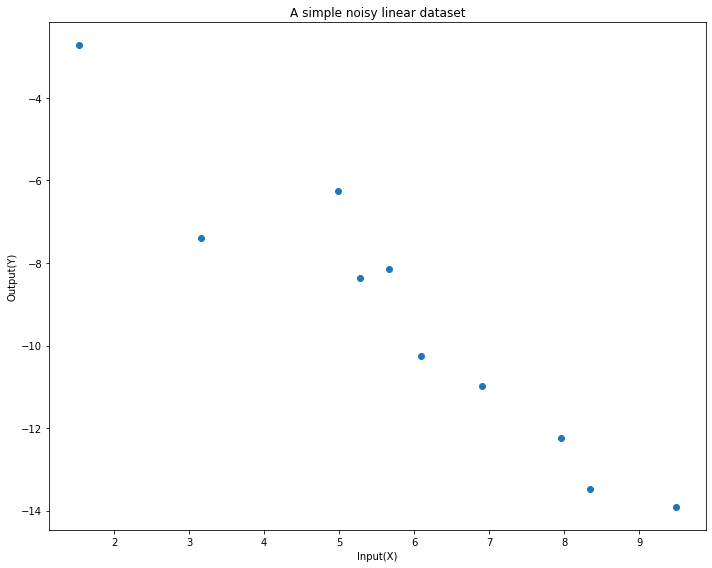

In [76]:
wTrue,bTrue = chooseParams()
n = 10
xLo = 1
xHi = 10
# noiseType = 'uniform'
noiseType = 'gaussian'
sigma = 1
X,yTrue = generateNoisyLinearData(n,xLo,xHi,wTrue,bTrue,noiseType,sigma)
plotLinearData(X,yTrue)

Calling a funtion, costForDifferentValuesOfW, to witness how the cost changes as we change w and keep the b constant

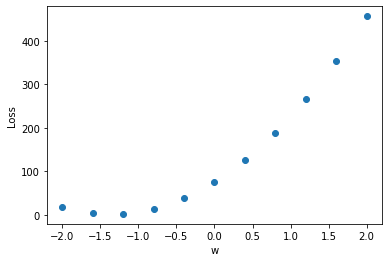

In [77]:
b = -1.359695095537608 #keeping b fixed
lossType = 1
costForDifferentValuesOfW(X,b,yTrue,lossType)

**Please uncomment this code is you want to see the datasets generated with varying noise**. 
We increase the noise in the originally linear data with varying standard deviation in noise component. As it is increased the data deteriotates to such a point that is cannot be predicted using a linear model. As the noise increase so does the loss.

Therefore, the value of the lowest cost that we can expect to obtain **depends on the amount of noise added and the model that we use to predict it.**


In [78]:
# wTrue_n,bTrue_n = chooseParams()
# n_n = 10
# xLo_n = 1
# xHi_n = 10
# # noiseType = 'uniform'
# noiseType_n = 'gaussian'
# fig = plt.figure(dpi=100, figsize=(10, 20), tight_layout=True)
# for i in range(0,20,3):
#   X_n,yTrue_n = generateNoisyLinearData(n_n,xLo_n,xHi_n,wTrue_n,bTrue_n,noiseType_n,i)
#   plotLinearData(X_n,yTrue_n)

# Step 3. The Loss Surface.

## a)

In [79]:
W_values = np.linspace(-2,2,100)
B_values = np.linspace(-2,2,100)
W,B = np.meshgrid(W_values,B_values)
C = cost(W,B,X,yTrue,1)

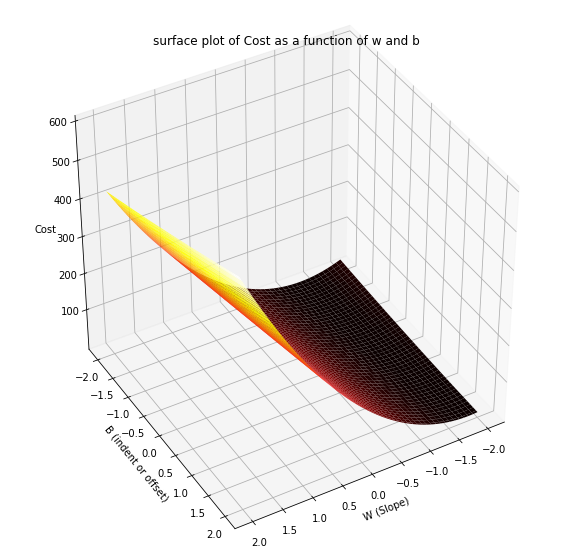

In [80]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
my_cmap = plt.get_cmap('hot')
ax.plot_surface(W,B,C,cmap = my_cmap,edgecolor ='none')
ax.set_xlabel('W (Slope)')
ax.set_ylabel('B (indent or offset)')
ax.set_zlabel('Cost')
plt.title('surface plot of Cost as a function of w and b')
ax.view_init(40,60)
plt.show()

## b)

The picture for expected contour plot.
https://drive.google.com/file/d/1cluVD5h23OVk3FrDfMxtgSmPO3tMIHfn/view?usp=sharing

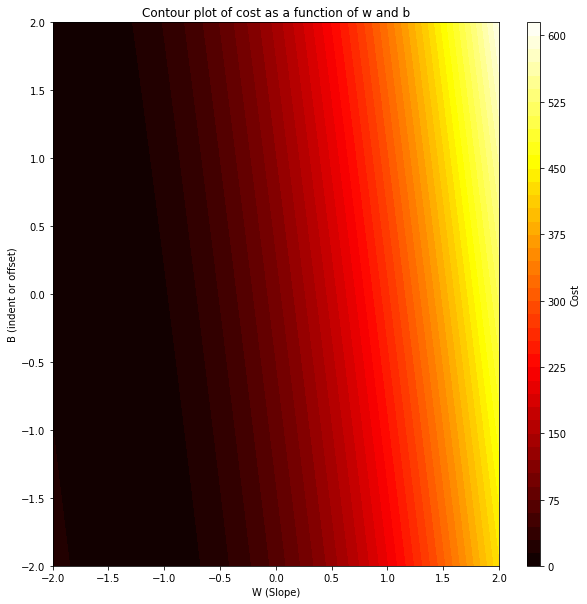

In [81]:
fig = plt.figure(figsize=(10,10))
my_cmap = plt.get_cmap('hot')
cs = plt.contourf(W,B,C,levels=50,cmap = my_cmap)
plt.xlabel('W (Slope)')
plt.ylabel('B (indent or offset)')
plt.colorbar(cs,aspect=40,label='Cost')
plt.title('Contour plot of cost as a function of w and b')
plt.show()

##c)

The expected guess would be the from the middle of the darkest oval part of the plot --> w = 0.5, b = 0.0

#Step 4. Solving the Optimization Directly.

Linear regression is an optimization problem. Here we minimize the cost function to get the best fit to the dataset. To minimize the cost function we will take the analytical approach in this step to find the optimal values of w and b that minimize cost.

##a)

On solving for optimal b analytically in terms of xi’s and yi’s i got <br>
<center> b = mean of Y</center>
Please see the derivation in the link : -
https://drive.google.com/file/d/1d4-2hpw8IoG99e9QjN0RVx74WBjPjyuY/view?usp=sharing

##b)

On solving for optimal w analytically in terms of xi’s and yi’s i got <br>
<center> w = $ \frac{mean\_of (X.Y)}{mean\_of (X2)}   $</center>

Please see the derivation in the link :-
https://drive.google.com/file/d/1czfz_fcrPbrnIcT1HMtgli_8h4YdTqCE/view?usp=sharing

##c)



Please see the analytical solution for optimal w and b in the link : - https://drive.google.com/file/d/1cx9coMCPYoIZPeLbhpQB3blzHn4E4Jn4/view?usp=sharing

#Step 5. Computing the Gradient of the Loss Function.

We wont get lucky always with our problems that can be solved analytically. Thus we use an algo that consists of iteratively reducing the error by updating the parameters in the direction that incrementally lowers the loss function. This algorithm is called gradient descent. 

In this step we will find and program those expressions(partial derivatives) which we will use to code gradient descent.

##a)

Derivation of analytical expressions for the partial derivatives of the cost function with respect to both w and b can be found on this link -: 

https://drive.google.com/file/d/1d4qFkUHMpzs-mT_LYkx5mQjDvLLHsSF-/view?usp=sharing

##b)

The functions return the partial derivatives(derived in the previous step) of the cost function with respect to w and b.

In [82]:
def computeDeriv_dC_dw(w,b,X,Y):
  return w * np.mean(X**2) + b * np.mean(X) - np.mean(X*Y)
def computeDeriv_dC_db(w,b,X,Y):
  return w * np.mean(X) + b - np.mean(Y)

##c)

Please open the link to find the analytical verification of expressions found for w and b :- <br> https://drive.google.com/file/d/1djNC4xviaNgsLZYG3u8qofGy3XtSrbBq/view?usp=sharing

Now we will plug the optimum values of w,b named wopt and bopt respectively, into the functions written above
- computeDeriv_dC_dw()
- computeDeriv_dC_db()

In [83]:
Y = yTrue

In [84]:
Wopt = ((np.mean(X) * np.mean(Y)) - np.mean(X*Y))/(np.mean(X)**2 - np.mean(X**2))

In [85]:
Bopt = (np.mean(X) * np.mean(X*Y) - np.mean(Y) * np.mean(X**2))  /  ( np.mean(X)**2 - np.mean(X**2))

On plugging optimum value into the function we recieve zero. Or something very close to zero given the float point issues in the language.

The reason for this is because, In the convex curve of cost function, I imagine that Wopt and Bopt are present at the lowest point of the curve where the slope is zero.

In [86]:
print(computeDeriv_dC_db(Wopt,Bopt,X,Y))
print(computeDeriv_dC_db(Wopt,Bopt,X,Y))

-8.881784197001252e-15
-8.881784197001252e-15


If we change the value of w and b in negative direction, the cost curve corresponding to it will have negative slope as the curve is descending. 
Whereas
If we change the value of w and b in positive direction, the cost curve corresponding to it will have positive slope as the curve is ascending. 

SO the result below checks out!

In [87]:
#the sign of your numerical derivatives are correct when changing w,b values
print(computeDeriv_dC_db(Wopt - 0.5,Bopt-0.5,X,Y))
print(computeDeriv_dC_db(Wopt+0.5,Bopt+0.5,X,Y))

-3.4719785092041793
3.4719785092041633


#Step 6. Implement Gradient Descent to Solve the Noisy Linear System.

In gradient descent we will find the model parameters that optimize the loss function. we change each parameter just a little bit so that the loss function decreases in each iteration. We take a small step in the direction opposite to the gradient. we update each parameter by subtracting a value that is proportional to the partial derivative of the cost with respect to that parameter. The propotionality constant alpha is called the learning rate.

<center> w = $ w - \alpha * \frac{dC}{dw}   $</center>
<center> b = $ b - \alpha * \frac{dC}{db}   $</center>

This updation will carry out by the number of times specified by the use using epochs parameter



In [88]:
def updateParams(w,b,X,Y,alpha,epochs):
  costRecord = np.array([[0,0,0]])
  for i in range(epochs):
    dC_dw = computeDeriv_dC_dw(w,b,X,Y)
    dC_db = computeDeriv_dC_db(w,b,X,Y)
    w = w - alpha * dC_dw
    b = b - alpha * dC_db
    costRecord = np.vstack((costRecord,[[w,b,cost(w,b,X,Y,0)]]))
  return costRecord
  


In [89]:
#let w,b be initialized randomly
w,b = chooseParams()
epochs = 100
alpha = 0.0001
costRecord = updateParams(w,b,X,Y,alpha,epochs)
Wgrad_opt = costRecord[-1,0]
Bgrad_opt = costRecord[-1,1]

Now that we have optimized value of w,b using gradient descent. Lets compare it with the optimal values of w and b we got using analytical approach

In [90]:
Wopt,Wgrad_opt

(-1.3864384732519346, -1.5507173707944506)

In [91]:
Bopt,Bgrad_opt

(-1.1324683206698734, -0.9428157002757861)

The values tend to differ . The optimal values differ. What about the cost? how much does it differ? If we run enough number of epochs with appropriate learning rate the cost does not differ much.

In [92]:
cost(Wopt,Bopt,X,Y,0),cost(Wgrad_opt,Bgrad_opt,X,Y,0)

(0.7267424124960195, 1.0981308827297422)

Lets see these values over contour plot. As we can see the points lie on almost the same concentric oval contour.

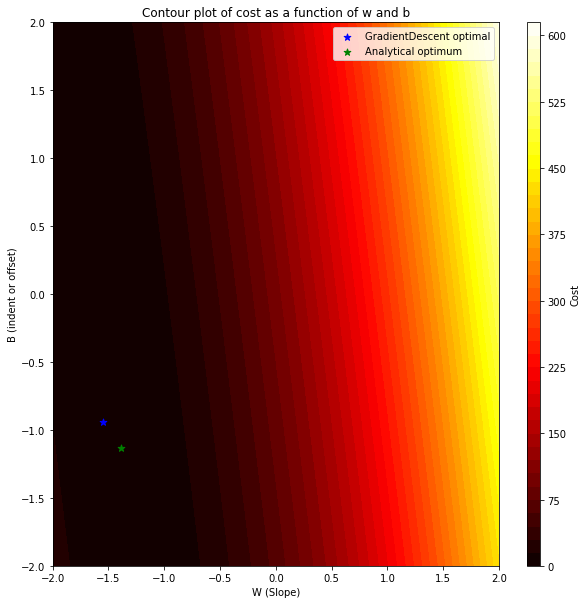

In [93]:

fig = plt.figure(figsize=(10,10))
my_cmap = plt.get_cmap('hot')
cs = plt.contourf(W,B,C,levels=50,cmap = my_cmap)
plt.scatter([Wgrad_opt],[Bgrad_opt],s=50,marker='*',color='blue',label='GradientDescent optimal')
plt.scatter([Wopt],[Bopt],s=50,marker='*',color='green',label='Analytical optimum')
plt.xlabel('W (Slope)')
plt.ylabel('B (indent or offset)')
plt.colorbar(cs,aspect=40,label='Cost')
plt.title('Contour plot of cost as a function of w and b')
plt.legend()
plt.show()

This is the convergence of error or cost function to the minima

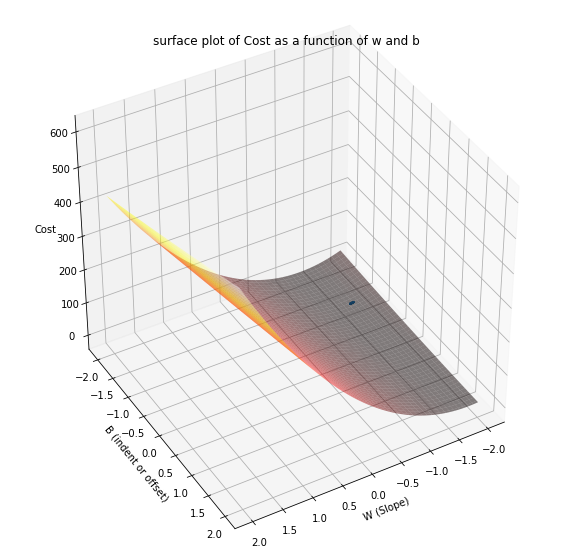

In [94]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
my_cmap = plt.get_cmap('hot')
ax.plot_surface(W,B,C,cmap = my_cmap,edgecolor ='none',alpha = 0.5)
ax.set_xlabel('W (Slope)')
ax.set_ylabel('B (indent or offset)')
ax.set_zlabel('Cost')
plt.title('surface plot of Cost as a function of w and b')
ax.view_init(40,60)
plt.scatter(costRecord[1:,0],costRecord[1:,1],costRecord[1:,2])
plt.show()

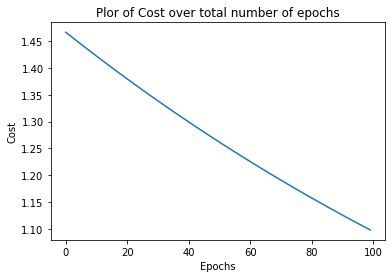

In [95]:
plt.plot(costRecord[1:,2])
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title("Plor of Cost over total number of epochs")
plt.show()

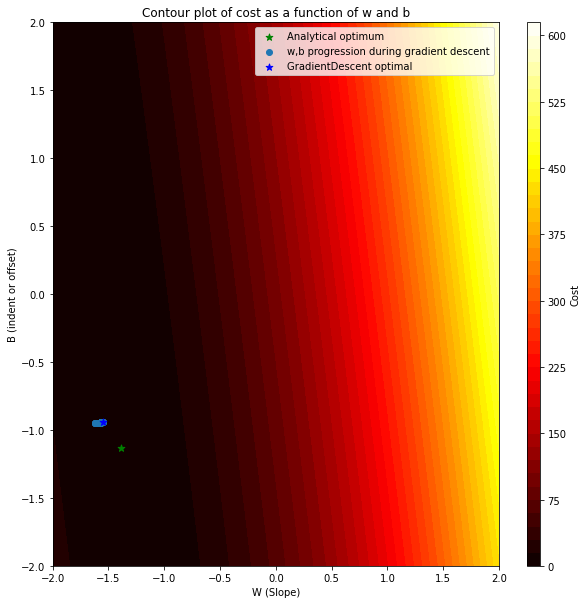

In [96]:
fig = plt.figure(figsize=(10,10))
my_cmap = plt.get_cmap('hot')
cs = plt.contourf(W,B,C,levels=50,cmap = my_cmap)

plt.scatter([Wopt],[Bopt],s=50,marker='*',color='green',label='Analytical optimum')
plt.xlabel('W (Slope)')
plt.ylabel('B (indent or offset)')
plt.colorbar(cs,aspect=40,label='Cost')
plt.title('Contour plot of cost as a function of w and b')
plt.scatter(costRecord[1:,0],costRecord[1:,1],label = 'w,b progression during gradient descent')
plt.scatter([Wgrad_opt],[Bgrad_opt],s=50,marker='*',color='blue',label='GradientDescent optimal')
plt.legend()
plt.show()

In [97]:
costwrtAlpha = []
epochs = 100
alpha = np.linspace(0.000001,0,20)
for i in range(20):
  costR = updateParams(w,b,X,Y,alpha[i],epochs)
  costwrtAlpha.append(costR[-1,-1])

What can you say about the qualitative behavior of gradient descent as the learning rate is changed?

When we have a low learning rate it takes more epochs for the algorithm to converge to the optimum. I imagine this as taking baby steps as we move towards the critical point of the convex curve of the cost function. If we take heigher alpha then the steps in each iteration would be big. And as a result we might oversoot the minima and not converge.Instead climb up the curve while toggling on opposite sides of the curve.

#Step 7. Add Regularization

So regularization is a concept that reduces the sensitivity of the parameters. It introduces the bias but reduces the variance on the test set. Here the loss is defined as -: Lreg= L+(½)λ(w2+b2)

where lambda decides how much do we need to penalize the magnitude of the hyperparameter. If lambda is heigher the sensitivity will be reduced. However if it is zero .. it will behave like no rregularization is done.

def computeDeriv_dC_dw(w,b,X,Y):
  return w * np.mean(X**2) + b * np.mean(X) - np.mean(X*Y)
def computeDeriv_dC_db(w,b,X,Y):
  return w * np.mean(X) + b - np.mean(Y)

In [98]:
def computeDeriv_dC_dw_reg(w,b,X,Y,lem):
  return w * np.mean(X**2) + b * np.mean(X) - np.mean(X*Y) + lem * w
def computeDeriv_dC_db_reg(w,b,X,Y,lem):
  return w * np.mean(X) + b - np.mean(Y) + lem * b

In [99]:
def updateParams_reg(w,b,X,Y,alpha,epochs,lembda):
  costRecord = np.array([[0,0,0]])
  for i in range(epochs):
    dC_dw = computeDeriv_dC_dw_reg(w,b,X,Y,lembda)
    dC_db = computeDeriv_dC_db_reg(w,b,X,Y,lembda)
    w = w - alpha * dC_dw
    b = b - alpha * dC_db
    costRecord = np.vstack((costRecord,[[w,b,cost(w,b,X,Y,0)]]))
  return costRecord
  


In [100]:
epochs = 100
alpha = 0.0001
lembda = 0
costRecord_reg = updateParams_reg(w,b,X,Y,alpha,epochs,lembda)

[]

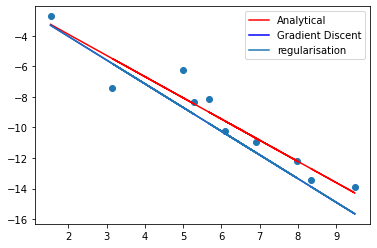

In [101]:
axes = plt.gca()
intercept = Bopt
slope = Wopt
y_vals = intercept + slope * X
plt.plot(X, y_vals, 'r-',label='Analytical')

intercept = Bgrad_opt
slope = Wgrad_opt
y_vals = intercept + slope * X
plt.plot(X, y_vals, 'b-',label='Gradient Discent')

intercept = costRecord_reg[-1,1]
slope =  costRecord_reg[-1,0]
y_vals = intercept + slope * X
plt.plot(X, y_vals, '-',label='regularisation')

plt.scatter(X,Y)
plt.legend()
plt.plot()

#Step 8

##a)

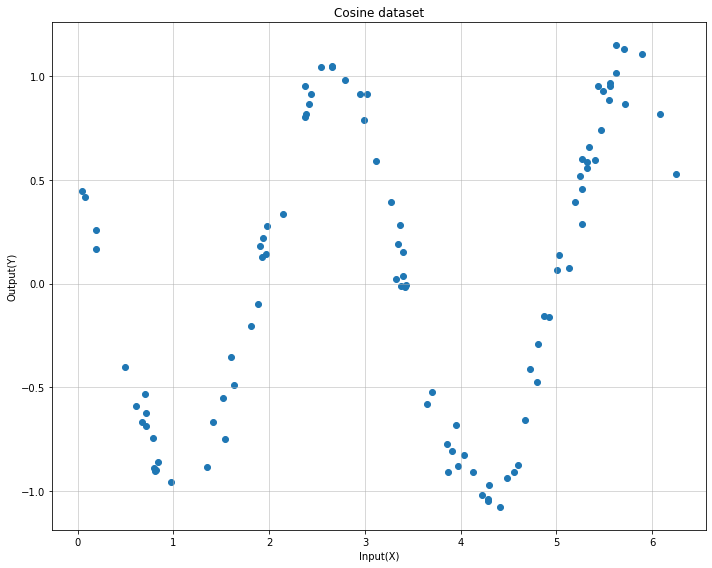

In [102]:
#import dataset
x, y =  np.load("dataset_cos.npy")
#plot the dataset
# plt.style.context('classic')
plt.figure(figsize=(10,8),tight_layout=True)
plt.scatter(x=x,y=y,)
plt.xlabel("Input(X)")
plt.ylabel("Output(Y)")
plt.title('Cosine dataset')
plt.grid(alpha=100)
plt.show() 

##b)

In [103]:
w,b = chooseParams()
costRecord = updateParams(w,b,x,y,alpha= 0.05,epochs = 1000)
w_gd,b_gd,cost_gd = costRecord[-1,0],costRecord[-1,1],costRecord[-1,2]
print("w,b : ",w_gd,b_gd)
print("Cost associated to a model using gradient discent",cost_gd)
#analytically we get the solution -> 1/2 * E(Y^^2)
print("Cost associated to a model that predicts zero always",0.5 * np.mean(y**2))

w,b :  0.12554142760189002 -0.39415839469755304
Cost associated to a model using gradient discent 0.5704673273702374
Cost associated to a model that predicts zero always 0.24635052732099738


Even Even after trying out different alpha and many epochs the linear model does not converge to beat analytial model.

Lets plot both the linear models to see how they try to fit the data

Analytical solution for model y = 0 for all x :

https://drive.google.com/file/d/1fAb1gVK9GoNGEexfEjHObbt43n0kS511/view?usp=sharing

[]

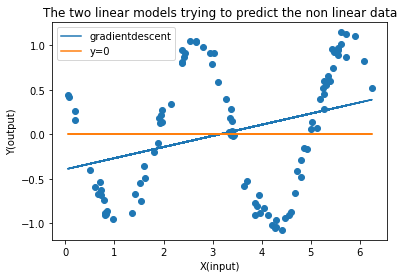

In [104]:

intercept = costRecord[-1,1]
slope =  costRecord[-1,0]
y_vals = intercept + slope * x
plt.plot(x, y_vals, '-',label='gradientdescent')

intercept = 0
slope =  0
y_vals = intercept + slope * x
plt.plot(x, y_vals, '-',label='y=0')

plt.scatter(x,y)
plt.legend()
plt.xlabel("X(input)")
plt.ylabel("Y(output)")
plt.title("The two linear models trying to predict the non linear data")
plt.plot()

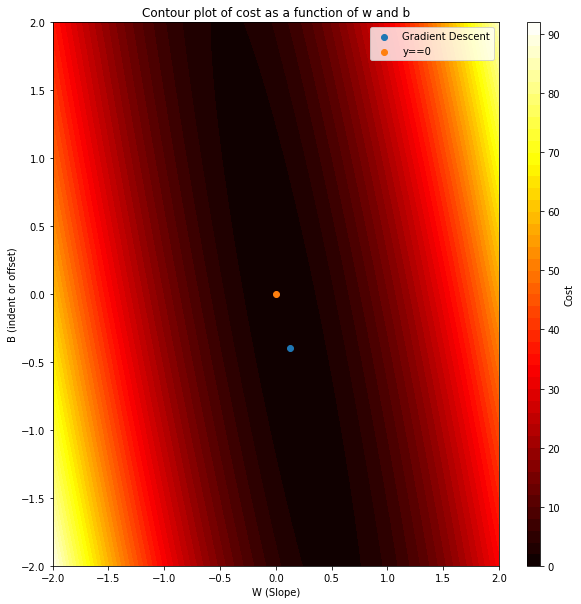

In [105]:
# the contour plot shows that we were in the minima
W_values = np.linspace(-2,2,100)
B_values = np.linspace(-2,2,100)
W,B = np.meshgrid(W_values,B_values)
C = cost(W,B,x,y,1)
fig = plt.figure(figsize=(10,10))
my_cmap = plt.get_cmap('hot')
cs = plt.contourf(W,B,C,levels=50,cmap = my_cmap)
plt.xlabel('W (Slope)')
plt.ylabel('B (indent or offset)')
plt.colorbar(cs,aspect=40,label='Cost')
plt.scatter(costRecord[-1,0],costRecord[-1,1],label='Gradient Descent')
plt.scatter(0,0,label='y==0')
plt.title('Contour plot of cost as a function of w and b')
plt.legend()
plt.show()

##c)

Update step for W - > https://drive.google.com/file/d/1fCfmy_GxcTunvkxE_9ar2zIwCEJpH_aw/view?usp=sharing <br>
Update step for b - >https://drive.google.com/file/d/1fHOgPelR4yLvQ2knic_qCGmiYwDSv652/view?usp=sharing <br>

Also I can fairly guess the value of w true as well as b.

I observed that the cycle of the cos function that the dataset is making is squished. The unmodulated wave of cos function is completed in 2 * $\pi$. But the cucle of a dataset is completed in $\pi$ itself. Hinting that the waveform have been squished two times.

Thus the value of x is in equation cos(w*x + b) is 2. 




##d)


In [106]:
def lossCosine(w,b,x,yTrue,lossType):
  yPred = np.cos(w*x+ b) #this statement is updated
  if lossType == 0:
    loss = np.abs(yPred - yTrue)
  elif lossType == 1:
    loss = (yPred - yTrue)**2
  else:
    print("Please select a correct lossType")
    return None
  return loss

def costCosine(w,b,X,yTrue,lossType):
  lossAggregate = 0
  for i in range(np.shape(X)[0]):
    costOfOnePoint = lossCosine(w,b,X[i],yTrue[i],lossType)#this statement is updated
    lossAggregate += costOfOnePoint
  lossAverage = lossAggregate/np.shape(X)[0]
  return lossAverage

def computeDeriv_dC_dw_cosine(w,b,X,Y,n):
  a = w*X + b
  return - ((1/(2*n)) * (np.sum(np.sin(2*a) * X ))) + ((1/n) * np.sum(X * Y * np.sin(a)))#this statement is updated

def computeDeriv_dC_db_cosine(w,b,X,Y,n):
  a = w*X + b
  return - ((1/(2*n)) * np.sum(np.sin(2*a))) + ((1/n) * np.sum(Y * np.sin(a)))#this statement is updated

def updateParamsCosine(w,b,X,Y,alpha,epochs,n):
  costRecord = np.array([[0,0,0]])
  for i in range(epochs):
    dC_dw = computeDeriv_dC_dw_cosine(w,b,X,Y,n)
    dC_db = computeDeriv_dC_db_cosine(w,b,X,Y,n)
    w = w - alpha * dC_dw
    b = b - alpha * dC_db
    costRecord = np.vstack((costRecord,[[w,b,costCosine(w,b,X,Y,1)]]))
  return costRecord
def diiferentInitialization(list,xinf,yinf,epochs,alpha,n):
  listt=[]
  for w,b in list:
    print("Starting (w,b) : ",w,b)
    costRecord = updateParamsCosine(w,b,xinf,yinf,alpha,epochs,n)
    w = costRecord[-1][0]
    b = costRecord[-1][1]
    c = costRecord[-1][2]
    print("Ending (w,b) : ",w,b,"\n With cost : ",c,"\n\n")
    listt.append(costRecord)
  return listt

In [107]:
epochs = 1000
alpha = 0.05
listt= ((0.1,0.0),(0.5,0.0),(1.5,0.0),(1.9,0.0))
l = np.array(diiferentInitialization(listt,x,y,epochs,alpha,x.shape[0]))

Starting (w,b) :  0.1 0.0
Ending (w,b) :  -0.12466817860037664 1.9639791425845727 
 With cost :  0.4446118893077003 


Starting (w,b) :  0.5 0.0
Ending (w,b) :  -0.12466407318522227 1.9639617775220426 
 With cost :  0.4446118905349541 


Starting (w,b) :  1.5 0.0
Ending (w,b) :  0.6720706339335214 1.575827892182302 
 With cost :  0.7393814103853444 


Starting (w,b) :  1.9 0.0
Ending (w,b) :  2.009390605957101 0.9504747887514224 
 With cost :  0.008668320365515353 




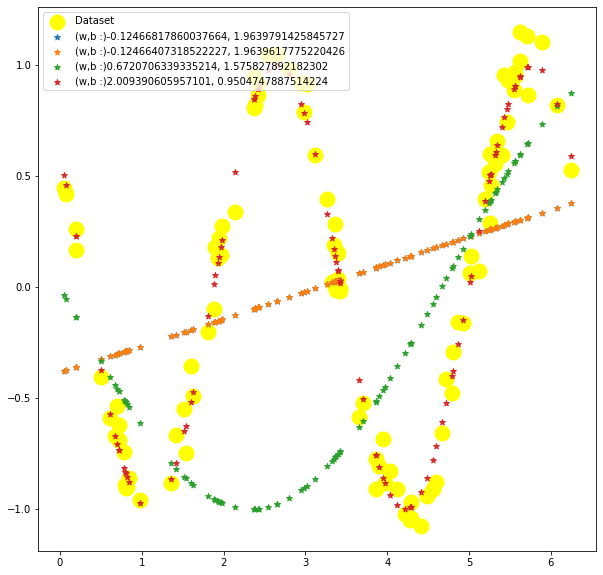

In [108]:

fig = plt.figure(figsize=(10,10))
plt.scatter(x,y,marker = 'o',linewidth=10,color='Yellow',label="Dataset")
for costRecord in l:
  w = costRecord[-1][0]
  b = costRecord[-1][1]
  axes = plt.gca()
  y_vals = np.cos(w*x + b)
  
  plt.scatter(x, y_vals,marker = '*',label="(w,b :)"+str(w)+", "+str(b))
plt.legend()
plt.show()

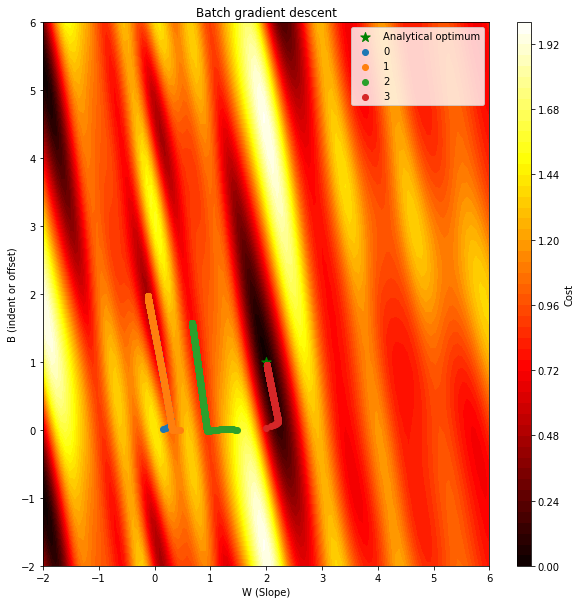

In [109]:
fig = plt.figure(figsize=(10,10))
W_values = np.linspace(-2,6,100)
B_values = np.linspace(-2,6,100)
W,B = np.meshgrid(W_values,B_values)
C = costCosine(W,B,x,y,1)
my_cmap = plt.get_cmap('hot')
cs = plt.contourf(W,B,C,levels=50,cmap = my_cmap)
plt.scatter(2,1,s=100,marker='*',color='green',label='Analytical optimum')
plt.xlabel('W (Slope)')
plt.ylabel('B (indent or offset)')
plt.colorbar(cs,aspect=40,label='Cost')
plt.title('Batch gradient descent')
for i in range(np.array(l).shape[0]):
  plt.scatter(l[i,1:,0],l[i,1:,1],label = i)
plt.legend()
plt.show()

Q) Discuss the performance, e.g. how close did you get to a zero loss for all initializations, and why? Provide some evidence for your answer.

Ans)We initialized parameters w,b with four different values. The fourth initialization where w,b were 1.9,0.0 respectively, gave the minimum error of 0.008668320365515353. We got this result because the last initialization was already close to the minima that happened to be the global minima, as displayed by the contour plot. Or in other words, the initial value of w and b were already close to the actual value.

Other initializations of w,b converged at their closesnt contours.

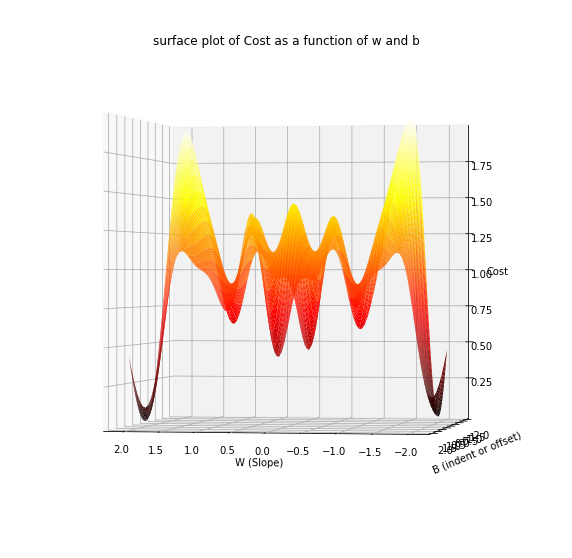

In [110]:
W_values = np.linspace(-2,2,100)
B_values = np.linspace(-2,2,100)
W,B = np.meshgrid(W_values,B_values)

C = costCosine(W,B,x,y,1)
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
my_cmap = plt.get_cmap('hot')
ax.plot_surface(W,B,C,cmap = my_cmap,edgecolor ='none')

ax.set_xlabel('W (Slope)')
ax.set_ylabel('B (indent or offset)')
ax.set_zlabel('Cost')
plt.title('surface plot of Cost as a function of w and b')
ax.view_init(00,100)
plt.show()

##e)

In [111]:
def updateParamsCosine(w,b,X,Y,alpha,epochs,n,mu=0.99):
  mw = 0
  mb = 0
  costRecord = np.array([[0,0,0]])
  for i in range(epochs):
    dC_dw = computeDeriv_dC_dw_cosine(w,b,X,Y,n)
    dC_db = computeDeriv_dC_db_cosine(w,b,X,Y,n)
    mw = mu * mw + dC_dw
    mb = mu * mb + dC_db
    w = w - alpha * mw
    b = b - alpha * mb
    costRecord = np.vstack((costRecord,[[w,b,costCosine(w,b,X,Y,1)]]))
  return costRecord
#mt+1,w = μ mt,w+ dL/dw; wt+1 = wt-⍺ mt+1,w,
def diiferentInitialization(list,xinf,yinf,epochs,alpha,n):
  listt=[]
  for w,b in list:
    print("Starting (w,b) : ",w,b)
    costRecord = updateParamsCosine(w,b,xinf,yinf,alpha,epochs,n)
    w = costRecord[-1][0]
    b = costRecord[-1][1]
    c = costRecord[-1][2]
    print("Ending (w,b) : ",w,b,"\n With cost : ",c,"\n\n")
    listt.append(costRecord)
  return listt


In [112]:
epochs = 100
alpha = 0.05
list= ((0.1,0.0),
       (0.5,0.0),
       (1.5,0.0),
       (1.9,0.0))
l = diiferentInitialization(list,x,y,epochs,alpha,x.shape[0])
l = np.array(l)

Starting (w,b) :  0.1 0.0
Ending (w,b) :  0.4268655932901795 3.6369609630876156 
 With cost :  0.6950627558585524 


Starting (w,b) :  0.5 0.0
Ending (w,b) :  -0.7035829859894229 5.175079391063889 
 With cost :  0.7755930278927061 


Starting (w,b) :  1.5 0.0
Ending (w,b) :  -1.0013816906416901 5.044115340828077 
 With cost :  1.011077233762571 


Starting (w,b) :  1.9 0.0
Ending (w,b) :  1.9791621781921815 0.47432574672463435 
 With cost :  0.1955205236965798 




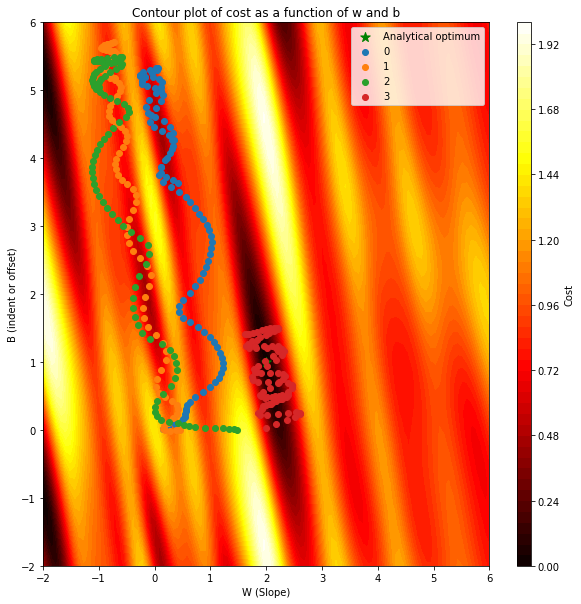

In [113]:
fig = plt.figure(figsize=(10,10))
W_values = np.linspace(-2,6,100)
B_values = np.linspace(-2,6,100)
W,B = np.meshgrid(W_values,B_values)
C = costCosine(W,B,x,y,1)
my_cmap = plt.get_cmap('hot')
cs = plt.contourf(W,B,C,levels=50,cmap = my_cmap)
plt.scatter(2,1,s=100,marker='*',color='green',label='Analytical optimum')
plt.xlabel('W (Slope)')
plt.ylabel('B (indent or offset)')
plt.colorbar(cs,aspect=40,label='Cost')
plt.title('Batch Gradient descent with momentum')
for i in range(np.array(l).shape[0]):
  plt.scatter(l[i,1:,0],l[i,1:,1],label = i)
plt.legend()
plt.show()

Do you converge for more initializations than you did without momentum? If so, why do you think this is? Does your answer fit with the explanation you gave in question d)?

No, We did not converge on any more points than we did in GD without momentum. But what we noticed that
a) the minima they converged was different from before.Because of momentum it overshot its contour but got stuck in different minima and could not found the global minima.

This implementation with momentum is much more aggressive than the simple BGD without momentum. By aggressive I mean that it is faster. Due to this nature  very features it is less likely to get stuck on a saddle point.

##f)

In [114]:
def computeDeriv_dC_dw_cosine(w,b,X,Y,n):
  a = w*X + b
  return - ((1/(2*n)) * (np.sum(np.sin(2*a) * X ))) + ((1/n) * np.sum(X * Y * np.sin(a)))
def computeDeriv_dC_db_cosine(w,b,X,Y,n):
  a = w*X + b
  return - ((1/(2*n)) * np.sum(np.sin(2*a))) + ((1/n) * np.sum(Y * np.sin(a)))

def updateParamsCosine(w,b,X,Y,alpha,epochs,mu=0.9):
  mw = 0
  mb = 0
  costRecord = np.array([[0,0,0]])
  for i in range(epochs):
    for j in range(x.shape[0]):
      dC_dw = computeDeriv_dC_dw_cosine(w,b,X[j],Y[j],1)
      dC_db = computeDeriv_dC_db_cosine(w,b,X[j],Y[j],1)
      w = w - alpha * dC_dw
      b = b - alpha * dC_db
      costRecord = np.vstack((costRecord,[[w,b,costCosine(w,b,X,Y,1)]]))
  return costRecord
#mt+1,w = μ mt,w+ dL/dw; wt+1 = wt-⍺ mt+1,w,
def diiferentInitialization(list,xinf,yinf,epochs,alpha,n):
  listt=[]
  for w,b in list:
    print("Starting (w,b) : ",w,b)
    costRecord = updateParamsCosine(w,b,xinf,yinf,alpha,epochs,n)
    w = costRecord[-1][0]
    b = costRecord[-1][1]
    c = costRecord[-1][2]
    print("Ending (w,b) : ",w,b,"\n With cost : ",c,"\n\n")
    listt.append(costRecord)
  return listt

epochs = 1000
alpha = 0.05
list= ((0.1,0.0),
       (0.5,0.0),
       (1.5,0.0),
       (1.9,0.0))
l = diiferentInitialization(list,x,y,epochs,alpha,1)
l = np.array(l)

Starting (w,b) :  0.1 0.0
Ending (w,b) :  1.9883972571810526 0.9521374471048046 
 With cost :  0.011783459172936241 


Starting (w,b) :  0.5 0.0
Ending (w,b) :  1.9883972571810526 0.9521374471048046 
 With cost :  0.011783459172936241 


Starting (w,b) :  1.5 0.0
Ending (w,b) :  1.988397257181053 0.9521374471048031 
 With cost :  0.011783459172936201 


Starting (w,b) :  1.9 0.0
Ending (w,b) :  1.988397257181053 0.9521374471048031 
 With cost :  0.011783459172936201 




Yes we converged for more points than with BGD.
All of these initializations managed to ignore their local minima and jump for the global minima. Why did this happen? It is because unlike the batch gradient descent which average of squared error over the entire dataset, we just looked at each sample. Due to this we took more steps and the variance of steps was a lot more.

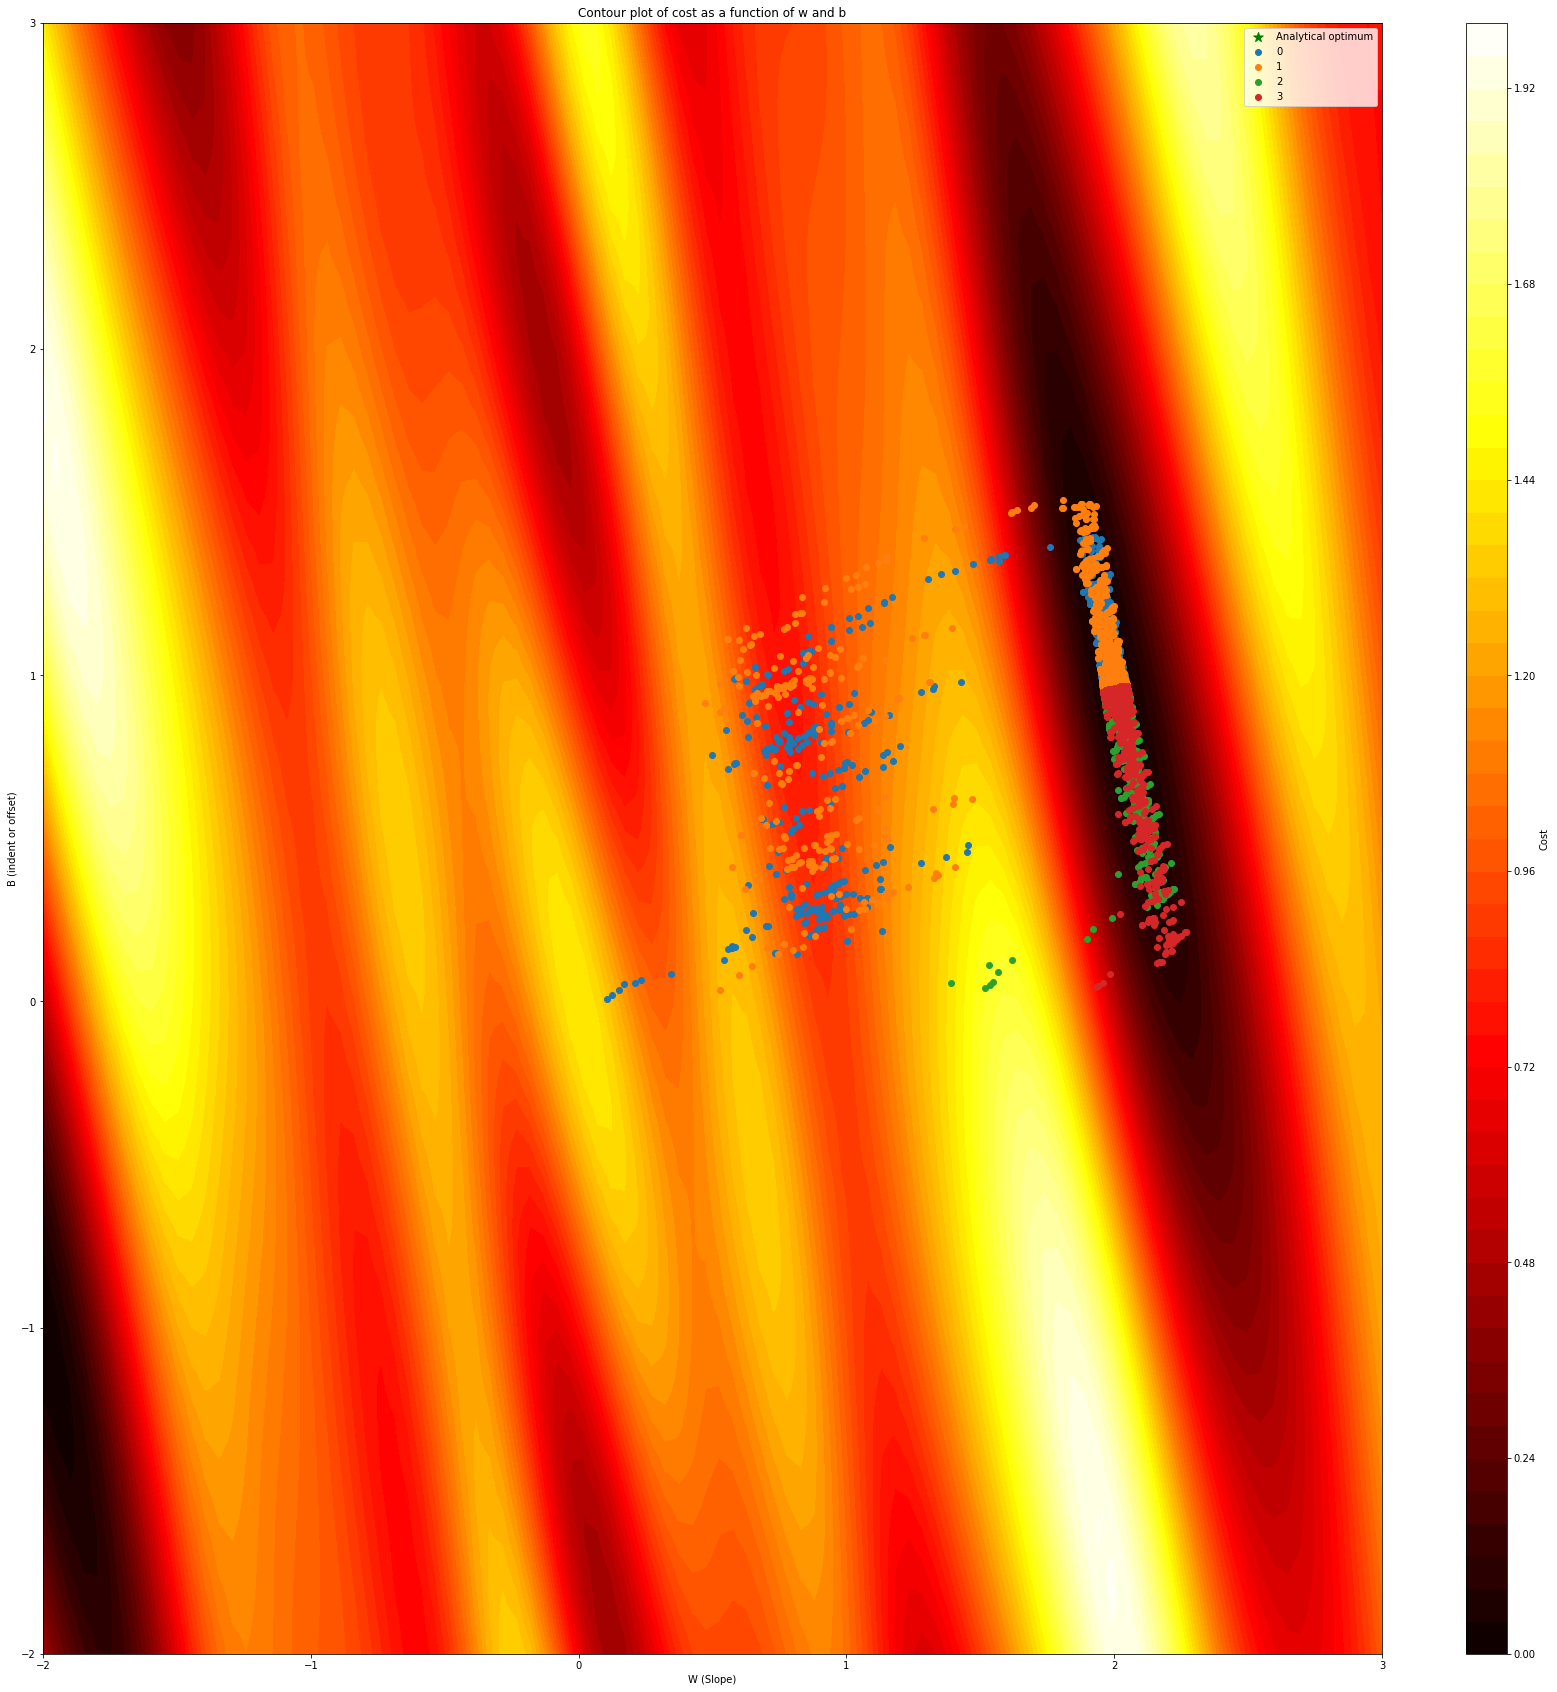

In [115]:
W_values = np.linspace(-2,3,100)
B_values = np.linspace(-2,3,100)
W,B = np.meshgrid(W_values,B_values)
C = costCosine(W,B,x,y,1)
fig = plt.figure(figsize=(30,30))
my_cmap = plt.get_cmap('hot')
cs = plt.contourf(W,B,C,levels=50,cmap = my_cmap)
plt.scatter(2,1,s=100,marker='*',color='green',label='Analytical optimum')
plt.xlabel('W (Slope)')
plt.ylabel('B (indent or offset)')
plt.colorbar(cs,aspect=40,label='Cost')
plt.title('Contour plot of cost as a function of w and b')
for i in range(np.array(l).shape[0]):
  plt.scatter(l[i,1:,0],l[i,1:,1],label = i)
plt.legend()
plt.show()

##g)

In [116]:
def updateParamsCosine(w,b,X,Y,alpha,epochs,n,mu=0.99):
  mw = 0
  mb = 0
  costRecord = np.array([[0,0,0]])
  for i in range(epochs):
    for j in range(x.shape[0]):
      dC_dw = computeDeriv_dC_dw_cosine(w,b,X[j],Y[j],n)
      dC_db = computeDeriv_dC_db_cosine(w,b,X[j],Y[j],n)
      mw = mu * mw + dC_dw
      mb = mu * mb + dC_db
      w = w - alpha * mw
      b = b - alpha * mb
      costRecord = np.vstack((costRecord,[[w,b,costCosine(w,b,X,Y,1)]]))
  return costRecord
#mt+1,w = μ mt,w+ dL/dw; wt+1 = wt-⍺ mt+1,w,
def diiferentInitialization(list,xinf,yinf,epochs,alpha,n):
  listt=[]
  for w,b in list:
    print("Starting (w,b) : ",w,b)
    costRecord = updateParamsCosine(w,b,xinf,yinf,alpha,epochs,n)
    w = costRecord[-1][0]
    b = costRecord[-1][1]
    c = costRecord[-1][2]
    print("Ending (w,b) : ",w,b,"\n With cost : ",c,"\n\n")
    listt.append(costRecord)
  return listt


In [117]:
epochs = 50
alpha = 0.05
list= ((0.1,0.0),
       (0.5,0.0),
       (1.5,0.0),
       (1.9,0.0))
l = diiferentInitialization(list,x,y,epochs,alpha,1)
l = np.array(l)

Starting (w,b) :  0.1 0.0
Ending (w,b) :  789.5762688549104 72.91782422731119 
 With cost :  1.0412784826608585 


Starting (w,b) :  0.5 0.0
Ending (w,b) :  -1157.4291137285338 -357.1097764645175 
 With cost :  1.124917505175607 


Starting (w,b) :  1.5 0.0
Ending (w,b) :  -871.318449306863 -182.39301063366756 
 With cost :  1.2161706591193806 


Starting (w,b) :  1.9 0.0
Ending (w,b) :  -1164.742075062279 -128.443138830888 
 With cost :  1.0128944572792105 




With such high learning rate along with momentum we overshoot all nearby minimas and go way above and beyond.

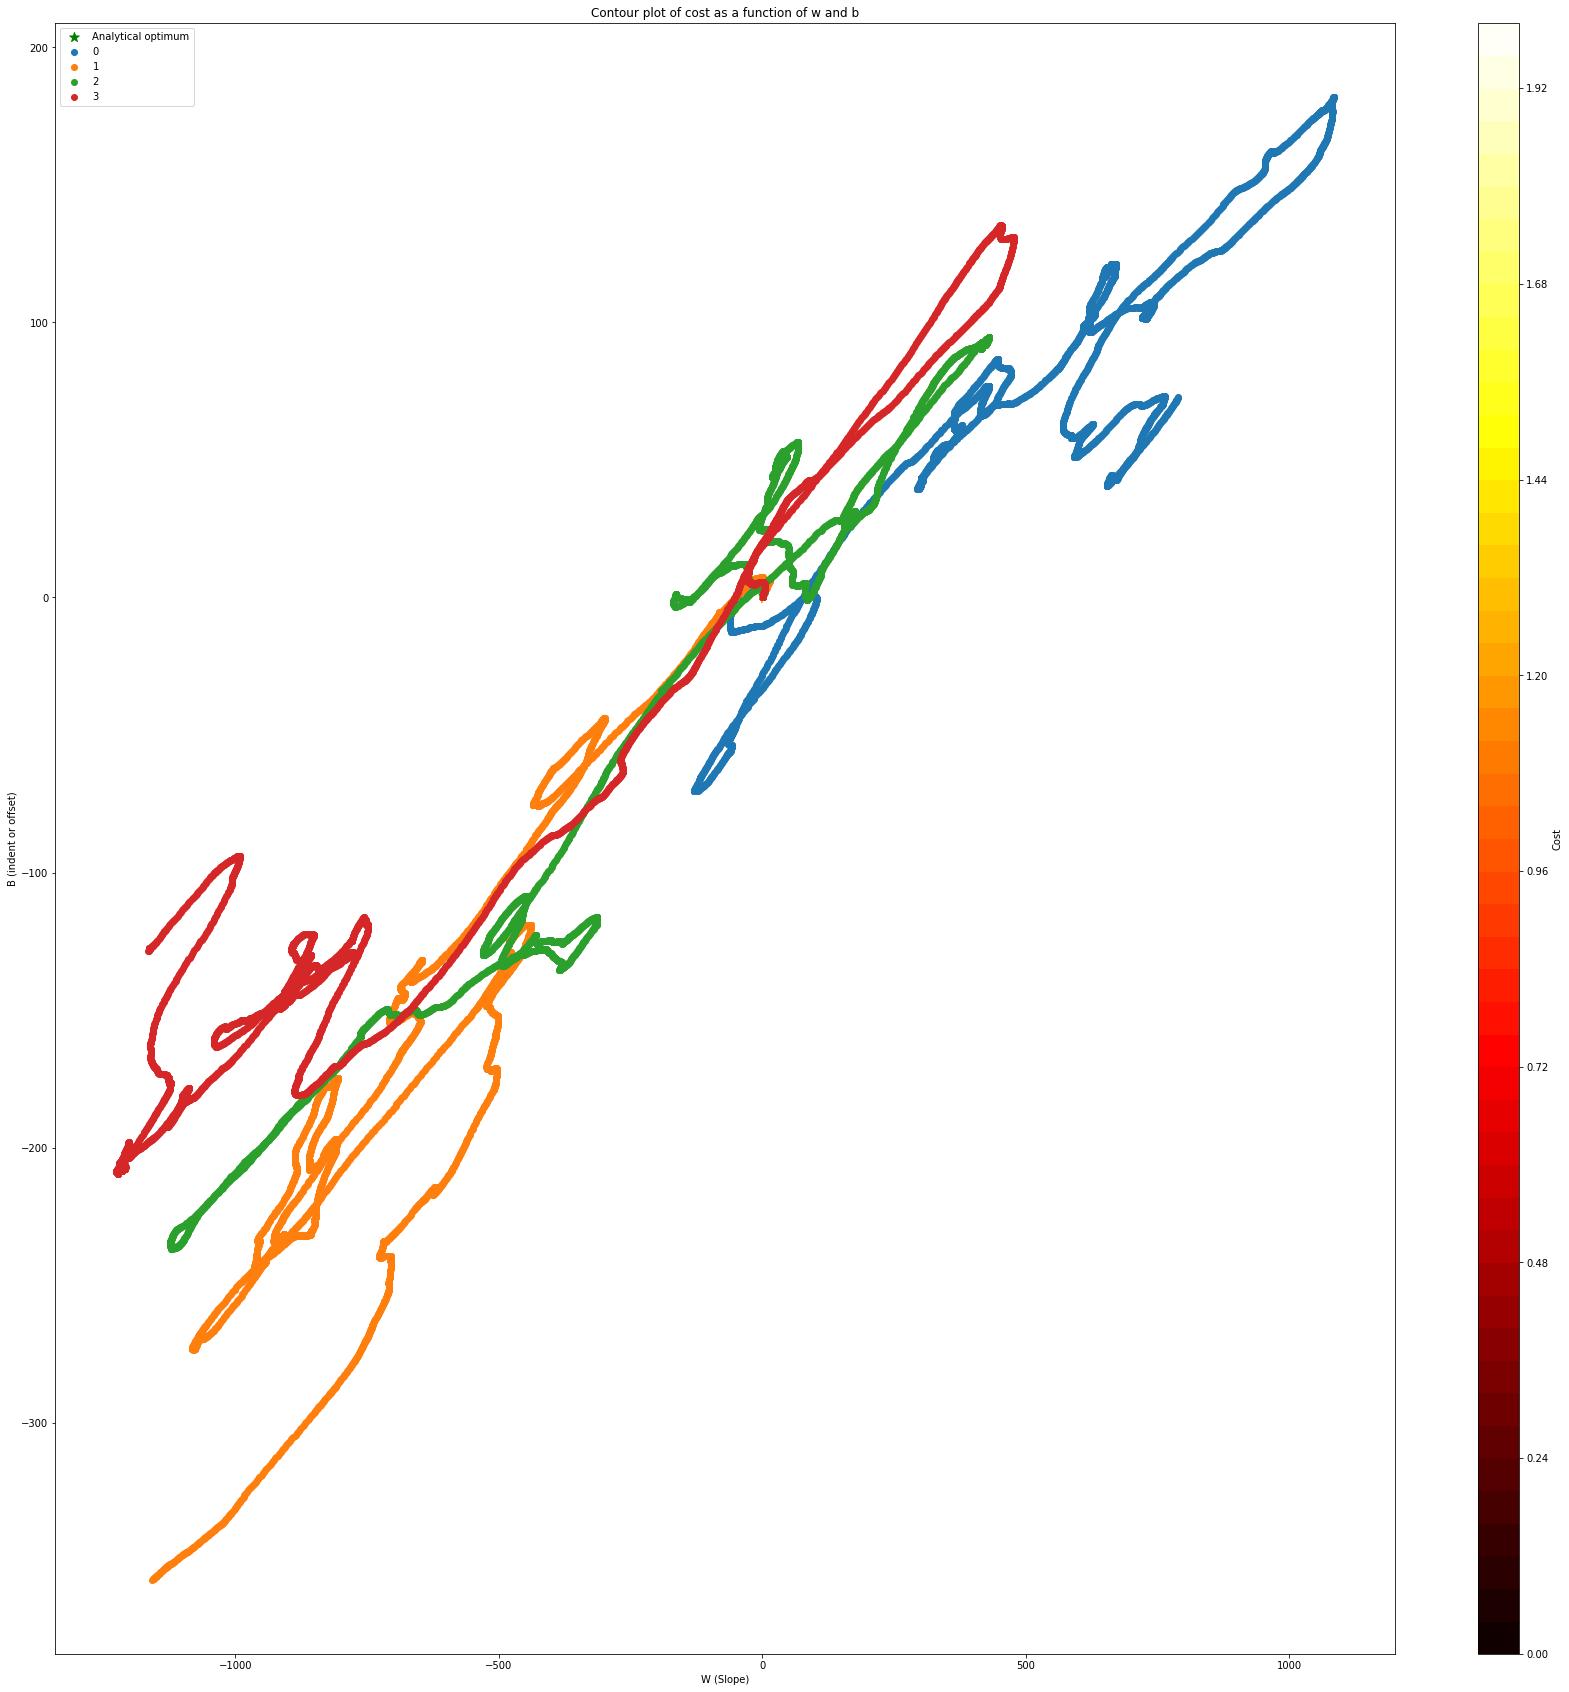

In [118]:
W_values = np.linspace(-2,3,100)
B_values = np.linspace(-2,3,100)
W,B = np.meshgrid(W_values,B_values)
C = costCosine(W,B,x,y,1)
fig = plt.figure(figsize=(30,30))
my_cmap = plt.get_cmap('hot')
cs = plt.contourf(W,B,C,levels=50,cmap = my_cmap)
plt.scatter(2,1,s=100,marker='*',color='green',label='Analytical optimum')
plt.xlabel('W (Slope)')
plt.ylabel('B (indent or offset)')
plt.colorbar(cs,aspect=40,label='Cost')
plt.title('Contour plot of cost as a function of w and b')
for i in range(np.array(l).shape[0]):
  plt.scatter(l[i,1:,0],l[i,1:,1],label = i)
plt.legend()
plt.show()

In [119]:
epochs = 800
alpha = 0.0005
list= ((0.1,0.0),
       (0.5,0.0),
       (1.5,0.0),
       (1.9,0.0))
l = diiferentInitialization(list,x,y,epochs,alpha,1)
l = np.array(l)

Starting (w,b) :  0.1 0.0
Ending (w,b) :  2.0785237766170104 0.9493658758602563 
 With cost :  0.04053095146168501 


Starting (w,b) :  0.5 0.0
Ending (w,b) :  2.0785237766170104 0.9493658758602563 
 With cost :  0.04053095146168501 


Starting (w,b) :  1.5 0.0
Ending (w,b) :  2.0785237766170104 0.9493658758602563 
 With cost :  0.04053095146168501 


Starting (w,b) :  1.9 0.0
Ending (w,b) :  2.0785237766170104 0.9493658758602563 
 With cost :  0.04053095146168501 




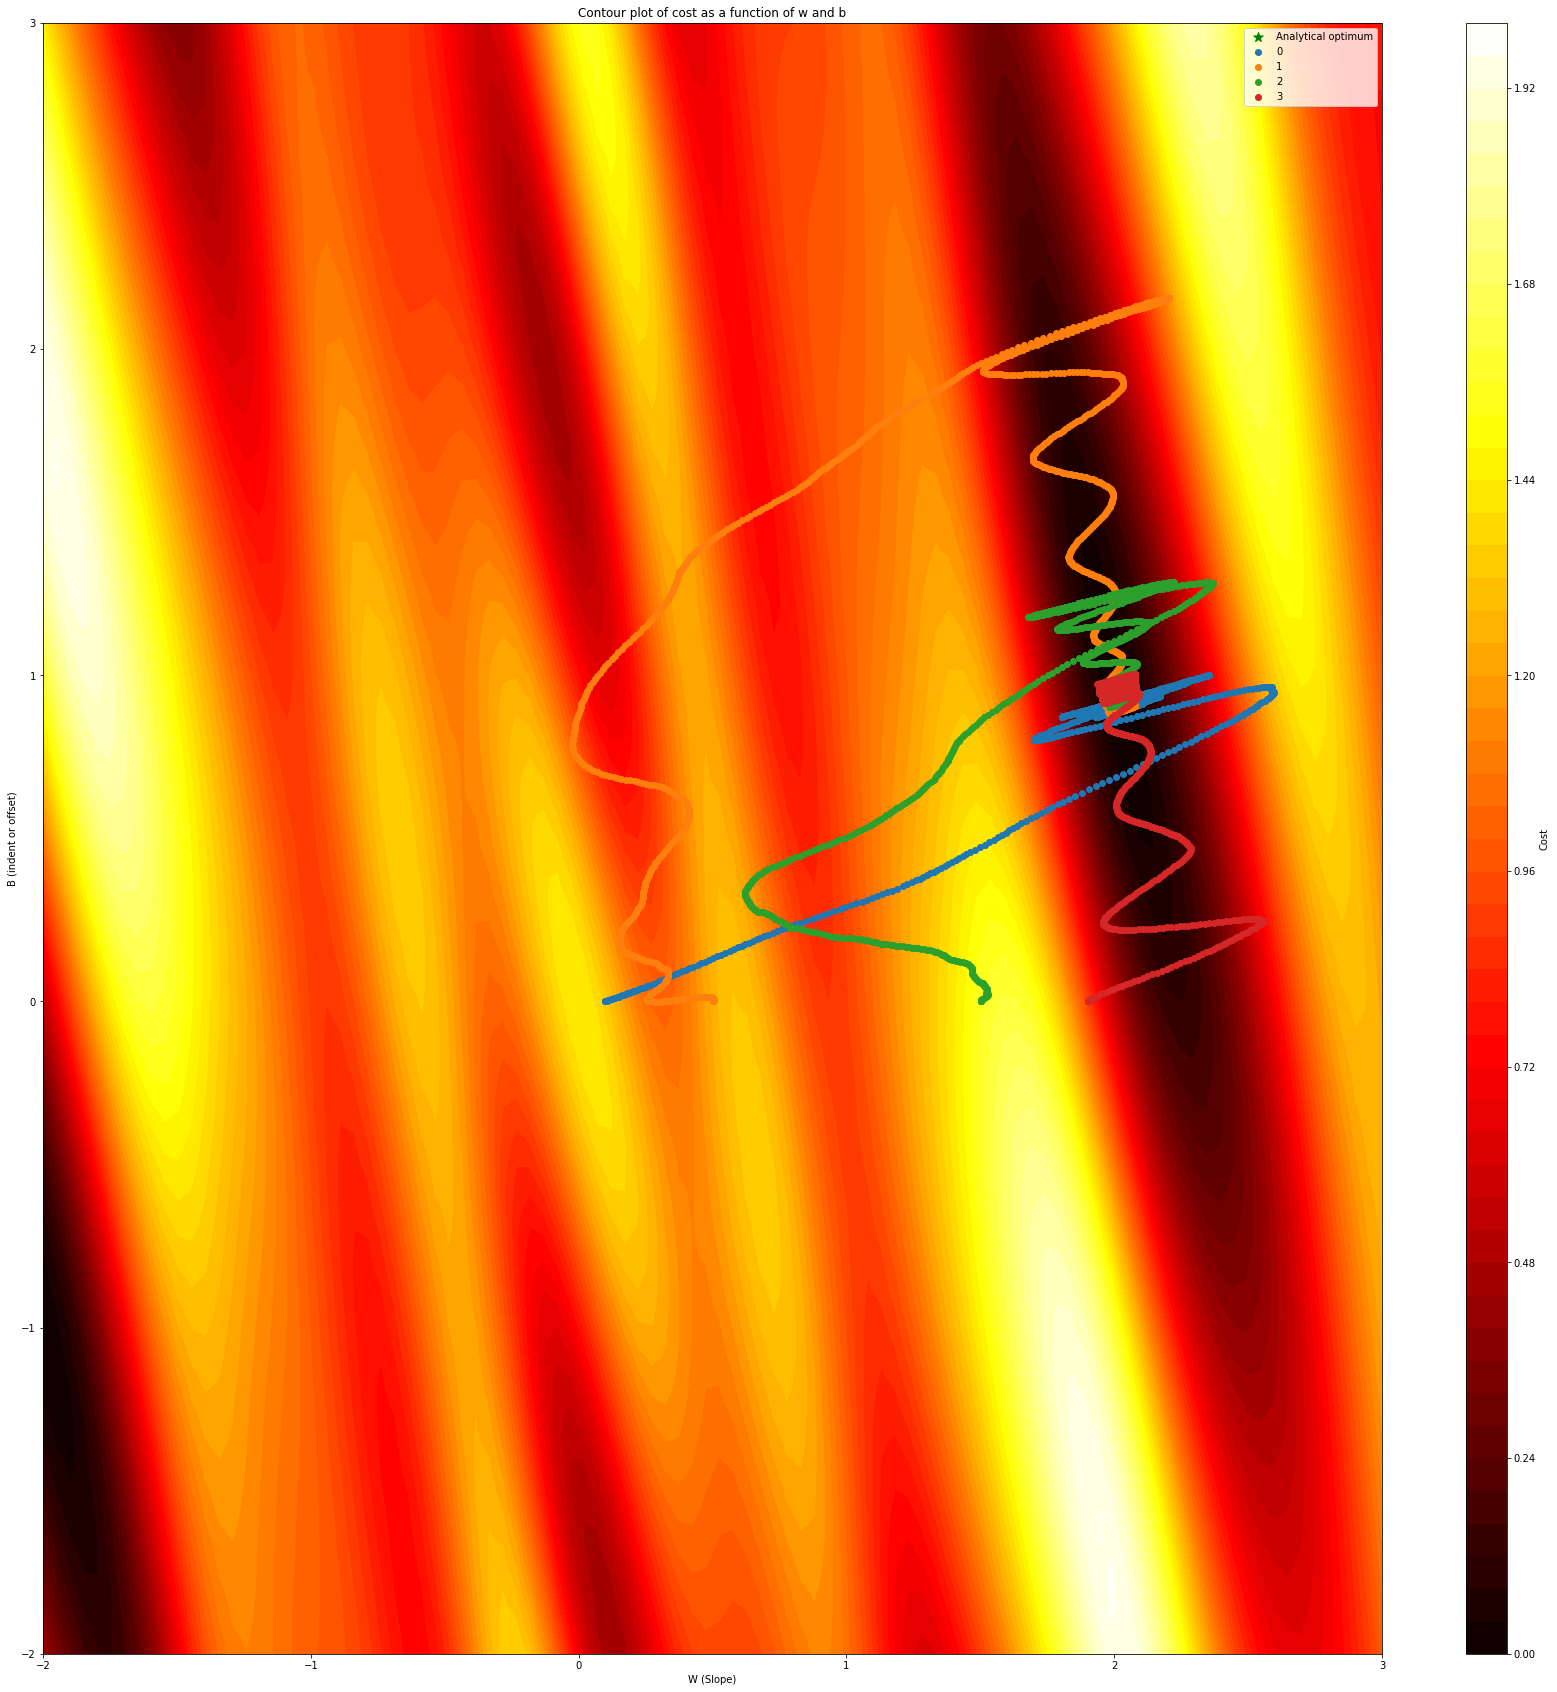

In [120]:
W_values = np.linspace(-2,3,100)
B_values = np.linspace(-2,3,100)
W,B = np.meshgrid(W_values,B_values)
C = costCosine(W,B,x,y,1)
fig = plt.figure(figsize=(30,30))
my_cmap = plt.get_cmap('hot')
cs = plt.contourf(W,B,C,levels=50,cmap = my_cmap)
plt.scatter(2,1,s=100,marker='*',color='green',label='Analytical optimum')
plt.xlabel('W (Slope)')
plt.ylabel('B (indent or offset)')
plt.colorbar(cs,aspect=40,label='Cost')
plt.title('Contour plot of cost as a function of w and b')
for i in range(np.array(l).shape[0]):
  plt.scatter(l[i,1:,0],l[i,1:,1],label = i)
plt.legend()
plt.show()

Do you manage to converge to better minimums than in g), i.e., values for the parameters closer to the true values?

With SGD along with momentum we had better convergence for all the points when we adjusted our alpha to 0.0005 once we intoduced momentum. And yes the values of w and b are quiet close to the true values.


##h)

If you found that convergence improved in e), f), and/or g) can you offer an explanation as to why this probably happened in each case?




'''Batch gradient descent: -<br>
0.4446118893077003 <br>
0.4446118905349541 <br>
0.7393814103853444 <br>
0.008668320365515353<br>
<br>
In step e) One initialization did better. <br>
The advantages of momentum were not as apparent in this step though.

0.44463724023572965 <br>
0.4446374851116863 <br>
0.4446898125548081 <br>
0.008682899040031734<br> 
<br>
In step f) the SGD was able to improve the convergence over BGD. The reseon was due to two factors.The total number of gradient steps we took were more. But as we can see in the trail of parameters the variance was very high. 
0.011783459172936241 <br>
0.011783459172936241 <br>
0.011783459172936201 <br>
0.011783459172936201 <br>
<br>
In step g) The cost did not reduce, It may be because the momentum does not know where is it leading the parameter therefor does not dampens before the curve of the cost functions begins to rise up again.
But from the  the trail of updation in parameters it is clear that the variance has reduced.<br>
0.04053095146168501<br> 
0.04053095146168501<br>
0.04053095146168501<br>
0.04053095146168501<br>
'''